<a href="https://colab.research.google.com/github/SungjooHwang/ICTclass/blob/main/Ex03_2_Classification_HeartData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load data
df = pd.read_csv('Ex03_2_heartData.csv')
#df = pd.read_csv('Ex03_2_heartData(Categorical).csv')
#df = pd.read_csv('Ex03_2_heartData(Multi).csv')

In [ ]:
df.head()

,Age,Cholesterol,ExerciseDuration,METs,RestingHeartRate,RestingSystolic,RestingDiastolic,MaxHeartRate,PeakExSystolic,PeakExDiastolic,InducedSTDep,HeartDisease
0,0.70833,0.37151,0.48649,0.6875,0.25316,0.49074,0.58333,0.60902,0.67949,0.61538,0.41071,0
1,0.79167,0.51955,0.43243,0.6875,0.30380,0.62963,0.66667,0.29323,0.48718,0.61538,0.26786,2
2,0.79167,0.36034,0.37838,0.5000,0.48101,0.25926,0.50000,0.45113,0.35897,0.51923,0.46429,1
3,0.16667,0.41899,0.62162,0.9375,0.55696,0.35185,0.46667,0.88722,0.71154,0.40385,0.62500,0
4,0.25000,0.29050,0.29730,0.4375,0.39241,0.35185,0.60000,0.77444,0.48718,0.46154,0.25000,0


In [ ]:
# Features and target
X = df.drop(columns=['HeartDisease'])   # input features
y = df['HeartDisease']                  # target label

In [ ]:
# Automatically encode categorical variables using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# (Optional) Use PCA if needed
# Standardize features before PCA
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
# Apply PCA
#pca = PCA(n_components=2)  # or choose a higher number
#X_pca = pca.fit_transform(X_scaled)
#print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
#print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")

In [ ]:
# Split into training and test sets (70% train / 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

print(f"{len(df)} original observations split into:")
print(f" + {len(X_train)} training observations")
print(f" + {len(X_test)} test observations")

427 original observations split into:
 + 298 training observations
 + 129 test observations


In [ ]:
# Train k-NN classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Test Various Models
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# model_knn = KNeighborsClassifier(n_neighbors=5)
# model_dt = DecisionTreeClassifier(random_state=42)
# model_svc_linear = SVC(kernel='linear', probability=True, random_state=42)
# model_svc_rbf = SVC(kernel='rbf', probability=True, random_state=42)
# model_linear_svc = LinearSVC(random_state=42, max_iter=10000)
# model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
# model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# model_lgbm = LGBMClassifier(random_state=42)

In [ ]:
# Evaluate training and test error
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
errTrain = 1 - train_accuracy
errTest = 1 - test_accuracy

In [ ]:
print(f"Training Error: {errTrain:.4f}")
print(f"Test Error: {errTest:.4f}")

Training Error: 0.3792
Test Error: 0.5736


In [ ]:
# Calculate False Negatives (from Confusion Matrix)

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_, normalize='true')

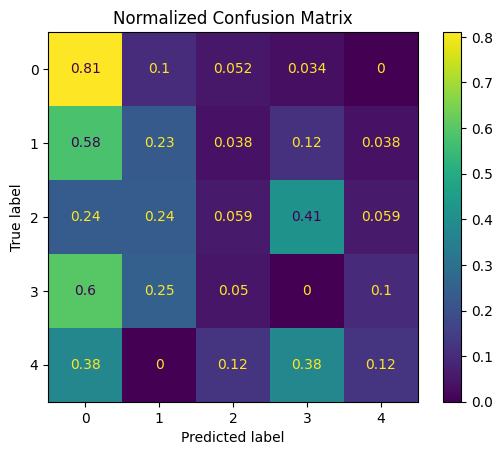

In [ ]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
disp.ax_.set_title("Normalized Confusion Matrix")
import matplotlib.pyplot as plt
plt.show()

In [ ]:
# False Negative Rate (row: actual=1, col: predicted=0)
false_negative_rate = cm[1, 0]  # normalized value: P(actual 1, predicted 0)
percentFN = false_negative_rate * 100

print(f"Percentage of False Negatives: {percentFN:.2f}%")

Percentage of False Negatives: 57.69%
